# Titanic dataset Part 2 : Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading the data

data_raw = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
# Taking care of missing values
# Columns with missing values
# Age, Embarked, Cabin

# Age
# subset of rows where age is missing
data_raw[data_raw['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


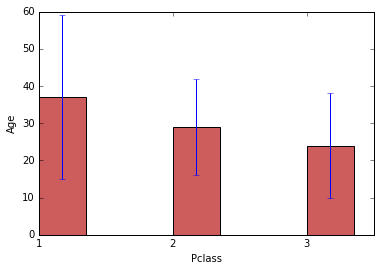

In [6]:
# We can see the age distribution between passenger classes
age_med = list(data_raw['Age'].groupby(data_raw['Pclass']).median())
Q1 = data_raw['Age'].groupby(data_raw['Pclass']).quantile(0.25)
Q3 = data_raw['Age'].groupby(data_raw['Pclass']).quantile(0.75)
age_iqr = list(Q3-Q1)

ind = np.arange(len(age_med))
width = 0.35
plt.bar(ind, age_med, width, color = 'indianred', yerr = age_iqr)
plt.xticks(ind,['1','2','3'])
plt.xlabel('Pclass')
plt.ylabel('Age')

In [7]:
# We will replace missing age values based on the class of ticket of the passenger

#lets make a copy of the original dataset

data_work = data_raw.copy()
class_age = {1: age_med[0], 2: age_med[1], 3: age_med[2]}
data_work['Age'][data_work['Age'].isnull()] = data_work['Pclass'][data_work['Age'].isnull()].map(class_age)
data_work.info()
# we see that the null values in the Age column are gone

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


C:\Users\Sayandeep\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# Embarked
# lets see which was the most common port of departure

data_work['PassengerId'].groupby(data_work['Embarked']).count()

Embarked
C    168
Q     77
S    644
dtype: int64

In [9]:
# We will therefore replace missing port of embarkation as S
data_work['Embarked'] = data_work['Embarked'].fillna('S')
data_work.info()
# Embarked column has no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [10]:
# Cabin
# We will fill up missing cabin values (actually deck values) by comparing with the price.

# lets create a column called 'Decks' that will provide the deck level for each passenger based on the cabin number
temp_df = data_work['Cabin'].dropna()
temp_df.head()
decks = []
index = []
for ind, val in zip(temp_df.index.values, temp_df): #recording the index labels, this will be useful for dataframe concatenation
    decks.append(val[0])
    index.append(ind)

deck_df = pd.DataFrame(decks, index = index) 
deck_df.columns = ['Decks'] #giving a name to the column
deck_df = deck_df[deck_df['Decks'] !='T'] 
deck_df.info()

data_temp = pd.concat([data_work,deck_df], axis = 1) # concat function automatically aligns rows with same indices. 
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 1 to 889
Data columns (total 1 columns):
Decks    203 non-null object
dtypes: object(1)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Decks          203 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


In [11]:
# For all the non- null values under 'Cabin', we need to see how many cabins were booked and divide the fare price by the 
# number of cabins to estimate the average price of a cabin based on the deck level

data_nonnull_cabin = data_temp[data_temp['Cabin'].notnull()]
def length(x):
    temp = x.split(' ')
    return len(temp)

Cabin = data_nonnull_cabin['Cabin']
num_of_cabins = map(length, list(Cabin))

no_cabins_df = pd.DataFrame(num_of_cabins, index = data_nonnull_cabin.index.values)
no_cabins_df.columns = ['No. of Cabins']

data_temp = pd.concat([data_temp,no_cabins_df], axis = 1)
data_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Decks,No. of Cabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,NaN,NaN


In [12]:
data_temp['Fare per cabin'] = data_temp['Fare'].divide(data_temp['No. of Cabins'], axis = 'rows')
data_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Decks,No. of Cabins,Fare per cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C,1,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN


[35.5,
 69.299999999999997,
 83.158299999999997,
 52.554200000000002,
 45.181249999999999,
 11.17915,
 13.581250000000001]

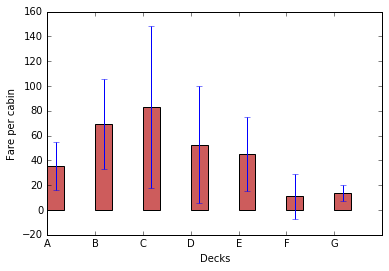

In [13]:
# Calculating median fares as a function of deck levels
fare_med = list(data_temp['Fare per cabin'].groupby(data_temp['Decks']).median())
Q1 = data_temp['Fare per cabin'].groupby(data_temp['Decks']).quantile(0.25)
Q3 = data_temp['Fare per cabin'].groupby(data_temp['Decks']).quantile(0.75)
fare_iqr = list(Q3-Q1)

ind = np.arange(len(fare_med))
width = 0.35
plt.bar(ind, fare_med, width, color = 'indianred', yerr = fare_iqr)
plt.xticks(ind,['A','B','C','D','E','F','G'])
plt.xlabel('Decks')
plt.ylabel('Fare per cabin')
fare_med

In [14]:
# We will fill up missing cabin values (actually deck values) by comparing with the price.
fare_deck_map = {0:'A',1: 'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'}

prices = data_temp['Fare'][data_temp['Decks'].isnull()]
def price_to_deck(prices, stats):
    ind = [np.argmin(np.abs(price - stats)) for price in prices]
    return ind

ind = pd.Series(price_to_deck(prices, fare_med), index = prices.index.values)

data_temp['Decks'][data_temp['Decks'].isnull()] = ind.map(fare_deck_map)

C:\Users\Sayandeep\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
data_temp.info()
# Now that all missing values have been populated, we will drop the temporary columns we created along the way. For example, 
# there is no way to fill up missing values of no.of cabins with the information we have. Also note that the Decks column now
# provides information abou the deck levels. We do not need the 'Cabins' column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               891 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          891 non-null object
Decks             891 non-null object
No. of Cabins     204 non-null float64
Fare per cabin    204 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 111.4+ KB


In [16]:
data_modified = data_temp.copy()
data_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Decks,No. of Cabins,Fare per cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,F,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,F,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C,1,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,F,NaN,NaN


In [17]:
del data_modified['Cabin']
del data_modified['Fare per cabin']
del data_modified['No. of Cabins']

In [18]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Decks          891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [19]:
# Before we begin applying machine learning algorithms, we will add some new features to the dataset.
# The group size : whether the passenger was alone or with family
# Person category: whether the passenger was an adult (male/female) or a child

data_modified['Group Size'] = data_modified['Parch'] + data_modified['SibSp']
def alone(passenger):
    grp_size = passenger
    if grp_size>0:
        return 'In group'
    else:
        return 'Alone'
    
data_modified['Group Size'] = data_modified['Group Size'].apply(alone)
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Decks          891 non-null object
Group Size     891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


In [20]:
def pass_category(pass_det):
    age, sex = pass_det
    if age < 18:
        return 'child'
    else:
        return sex
    
data_modified['Person Category'] = data_modified[['Age', 'Sex']].apply(pass_category, axis = 1)
data_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Decks,Group Size,Person Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,F,In group,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,In group,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,F,Alone,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,In group,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,F,Alone,male


In [21]:
# We will select some of the main features in the dataset. Some features such as SIbSp and Parch were combined to generate new
# features. Hence we leave out the individual component features. Note we converted numerical features to categorial features. 
# This process generally results in more abstraction and as a result might be less accurate. The results that follow will be
# heavily influenced on the choice of features and their type (numerical or categorical)

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Decks', 'Group Size','Person Category']
X_raw = data_modified[features]
y_raw = data_modified['Survived']

In [22]:
# Extracting categorical and numerical attributes
X_raw_categorical = X_raw.select_dtypes(include  = ['object'])
X_raw_numerical = X_raw.select_dtypes(include  = ['int64', 'float64'])
print X_raw_categorical.shape, X_raw_numerical.shape

(891, 5) (891, 3)


In [23]:
X_raw_numerical_arr = X_raw_numerical.as_matrix()
X_raw_categorical_arr = X_raw_categorical.as_matrix()
# lets check the shapes of the arrays for sanity
print X_raw_categorical_arr.shape, X_raw_numerical_arr.shape

(891L, 5L) (891L, 3L)


In [24]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer

num_operations = StandardScaler()
cat_operations = LabelBinarizer()

X_prepared = num_operations.fit_transform(X_raw_numerical_arr)
for ind in range(X_raw_categorical_arr.shape[1]):
    col = X_raw_categorical_arr[:,ind]
    col_trans = cat_operations.fit_transform(col)
    X_prepared = np.c_[X_prepared, col_trans]

In [ ]:
''' We will use an ensemble of classifiers for the given task. In ensemble learning, bank of classifiers are trained for the same
goal and the outputs of the  individual classifiers are combined to compute the final decision (class label). More the 
diversity between classifiers, better is the ensemble system. The ensemble system is more robust, mus less sensitive to input
variations and most importantly much less prone to over-fitting. Diversity means each individual classifier learns something
different from the other classifiers. Most easy way to introduce this diversity is by resampling the traning set and training
the same classifier but with varying training sets. This is called "Bagging" or "Bootsrap Aggregating". In this exercise, we
will introduce diversity by keeping the training set same but using completely different classifiers. Specifically we will use
1. Stochastic Gradient Classifier, 2. Logistic Regression,  3. Support Vector Machine, 4. Randon Forest, 5. Naive Bayes', 
6. K-Nearest Neighbor.'''

In [25]:
# We will use cross validation to evaluate the models. Also we will use gridsearch for hyper-parameter tuning. So let's import 
# the necessary modules.
from __future__ import division
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

X = X_prepared
y = y_raw.as_matrix()

X.shape, y.shape

((891L, 18L), (891L,))

In [26]:
# Let us run a grid search and design the best classifier of each type with the best hyper-parameters
# SGD Classifier
param_grid = [{'learning_rate' : ['constant', 'optimal', 'invscaling'], 'eta0' : [0.1, 0.05, 0.01]}]
sgd_clf = SGDClassifier(loss = 'log',random_state =1)
gridsearch_sgd = GridSearchCV(sgd_clf, param_grid, cv = 5, n_jobs =4, verbose = 2)
gridsearch_sgd.fit(X, y)
best_sgd_clf = gridsearch_sgd.best_estimator_
print gridsearch_sgd.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'learning_rate': 'constant', 'eta0': 0.05}


[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.7s finished


In [27]:
# Logistic Regression
param_grid = [{'C' : [1,10,100,1000]}]
lgr_clf = LogisticRegression(random_state = 1)
gridsearch_lgr = GridSearchCV(lgr_clf, param_grid, cv = 5, n_jobs = 4, verbose = 2)
gridsearch_lgr.fit(X, y)
best_lgr_clf = gridsearch_lgr.best_estimator_
print gridsearch_lgr.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'C': 1}


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.5s finished


In [28]:
# Random Forest
param_grid = [{'n_estimators' : [10,100,300,500], 'max_depth': [3,5,8,10,15]}]
raf_clf = RandomForestClassifier(random_state = 1)
gridsearch_raf = GridSearchCV(raf_clf, param_grid, cv = 5, n_jobs = 4, verbose = 2)
gridsearch_raf.fit(X,y)
best_raf_clf = gridsearch_raf.best_estimator_
print gridsearch_raf.best_params_

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   21.6s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 100, 'max_depth': 10}


In [29]:
# Naive Bayes'
nab_clf = GaussianNB()
nab_clf.fit(X,y)

GaussianNB(priors=None)

In [30]:
# Support Vector Machine
param_grid = [{'kernel' : ['linear', 'rbf'], 'C' : [0.1, 1, 10, 100], 'gamma' : [0.001,0.01, 0.1, 0.5]},\
             {'kernel' : ['poly'],'degree': [2,3] }]
svm_clf = SVC(random_state = 1)
gridsearch_svm = GridSearchCV(svm_clf, param_grid, cv = 5, n_jobs =4 ,verbose = 2)
gridsearch_svm.fit(X,y)
best_svm_clf = gridsearch_svm.best_estimator_
print gridsearch_svm.best_params_

[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 170 out of 170 | elapsed:    2.6s finished


Fitting 5 folds for each of 34 candidates, totalling 170 fits
{'kernel': 'rbf', 'C': 1, 'gamma': 0.1}


In [31]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric

V = np.cov(X.transpose())
maha = DistanceMetric.get_metric('mahalanobis',V=V)


param_grid = [{'n_neighbors' : [3,5,7,9], 'metric': ['minkowski', maha, 'euclidean'] }]
knn_clf = KNeighborsClassifier()
gridsearch_knn = GridSearchCV(knn_clf, param_grid, cv = 5, n_jobs = 4, verbose = 2)
gridsearch_knn.fit(X,y)
best_knn_clf = gridsearch_knn.best_estimator_
print gridsearch_knn.best_params_

[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    1.9s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'n_neighbors': 5, 'metric': 'minkowski'}


In [32]:
# Now that we have 6 tuned classifiers, lets combine them and test the ensemble on the train set using cross validation
from sklearn.ensemble import VotingClassifier

ens_clf = VotingClassifier(estimators = [('sgd', best_sgd_clf) , ('lgr', best_lgr_clf), ('nab', nab_clf),\
                                        ('raf', best_raf_clf), ('svm', best_svm_clf), ('knn', best_knn_clf)])

ens_clf.fit(X, y)
classifier_list = [best_sgd_clf, best_lgr_clf, nab_clf, best_raf_clf, best_svm_clf, best_knn_clf, ens_clf]
labels = ['SGD', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'K-NN', 'Ensemble']
weights = []
for clf, label in zip(classifier_list, labels):
    scores = cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy')
    temp  = np.log(scores.mean()/(1-scores.mean()))
    weights.append(temp)
    print 'Accuracy: %0.2f (+/- %0.4f) [%s]' %(scores.mean(), scores.std(), label)

Accuracy: 0.81 (+/- 0.0292) [SGD]
Accuracy: 0.81 (+/- 0.0311) [Logistic Regression]
Accuracy: 0.76 (+/- 0.0293) [Naive Bayes]
Accuracy: 0.84 (+/- 0.0380) [Random Forest]
Accuracy: 0.82 (+/- 0.0280) [Support Vector Machine]
Accuracy: 0.81 (+/- 0.0258) [K-NN]
Accuracy: 0.82 (+/- 0.0321) [Ensemble]


In [33]:
# Sometimes accuracy is not a good way to judge performance especially when distributions of classes are skewed. We will use a
# more robust method, namely the confusion matrix.
# To compute the confusion matrix, we need the predicted classes from all the classifiers and the ensemble.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

for clf, label in zip(classifier_list, labels):
    y_pred = cross_val_predict(clf, X, y, cv = 5)
    f1score = f1_score(y, y_pred)
    pre_score = precision_score(y,y_pred)
    rec_score = recall_score(y,y_pred)
    conf_mat = confusion_matrix(y, y_pred)
    row_sums = conf_mat.sum(axis = 1, keepdims = True)
    norm_conf_mat = conf_mat/row_sums
    true_positive = norm_conf_mat[1,1]
    false_alarm = norm_conf_mat[0,1]
    print 'F1-Score: %0.2f, True Detection: %0.2f, False Alarm: %0.2f  [%s]' %(f1score, true_positive, false_alarm, label)
    
# Any non-zero value on the off-diagonal elements in the confusion matrix means there is an error. The top right is false alarm 
# or Type I error, and the bottom left is mis-detection or the Type II error. Consolidating the confusion matrix into one single
# number is ieasier for us mortals to comprehend. We will use the predicted values to compute the F1 score which is the harmonic
# mean of the precision and recall. Higher the F1 score (max is 1) better is the performance

F1-Score: 0.75, True Detection: 0.75, False Alarm: 0.15  [SGD]
F1-Score: 0.74, True Detection: 0.72, False Alarm: 0.14  [Logistic Regression]
F1-Score: 0.69, True Detection: 0.75, False Alarm: 0.27  [Naive Bayes]
F1-Score: 0.76, True Detection: 0.73, False Alarm: 0.11  [Random Forest]
F1-Score: 0.74, True Detection: 0.67, False Alarm: 0.08  [Support Vector Machine]
F1-Score: 0.73, True Detection: 0.71, False Alarm: 0.14  [K-NN]
F1-Score: 0.75, True Detection: 0.71, False Alarm: 0.11  [Ensemble]


In [34]:
# we will next try weighted majority voting which gives more trust to the better classifiers
ens_clf_wt = VotingClassifier(estimators = [('sgd', best_sgd_clf) , ('lgr', best_lgr_clf), ('nab', nab_clf),\
                                        ('raf', best_raf_clf), ('svm', best_svm_clf), ('knn', best_knn_clf)], weights = weights[:-1])
ens_clf_wt.fit(X, y)
classifier_list = [best_sgd_clf, best_lgr_clf, nab_clf, best_raf_clf, best_svm_clf, best_knn_clf, ens_clf_wt]
labels = ['SGD', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'K-NN', 'Ensemble']
for clf, label in zip(classifier_list, labels):
    scores = cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy')
    print 'Accuracy: %0.2f (+/- %0.4f) [%s]' %(scores.mean(), scores.std(), label)

Accuracy: 0.81 (+/- 0.0292) [SGD]
Accuracy: 0.81 (+/- 0.0311) [Logistic Regression]
Accuracy: 0.76 (+/- 0.0293) [Naive Bayes]
Accuracy: 0.84 (+/- 0.0380) [Random Forest]
Accuracy: 0.82 (+/- 0.0280) [Support Vector Machine]
Accuracy: 0.81 (+/- 0.0258) [K-NN]
Accuracy: 0.82 (+/- 0.0317) [Ensemble]


In [62]:
# lets try a simple neural net (multi-layer perceptron)
from sklearn.neural_network import MLPClassifier

param_grid = [{'activation' : ['relu', 'tanh'], 'hidden_layer_sizes' : [(100,),(50,),(100,50),(10,10),(20,10)]}]
mlp_clf = MLPClassifier(max_iter = 1000, random_state = 42, learning_rate = 'adaptive')
gridsearch_mlp = GridSearchCV(mlp_clf, param_grid, cv = 5, n_jobs = 4, verbose = 2)
gridsearch_mlp.fit(X,y)
best_mlp_clf = gridsearch_mlp.best_estimator_
print gridsearch_mlp.best_params_

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   10.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'activation': 'relu', 'hidden_layer_sizes': (50,)}


In [63]:
ens_clf = VotingClassifier(estimators = [('sgd', best_sgd_clf) , ('lgr', best_lgr_clf), ('nab', nab_clf),\
                                        ('raf', best_raf_clf), ('svm', best_svm_clf), ('knn', best_knn_clf),\
                                        ('mlp', best_mlp_clf)])

ens_clf.fit(X, y)
classifier_list = [best_sgd_clf, best_lgr_clf, nab_clf, best_raf_clf, best_svm_clf, best_knn_clf, best_mlp_clf, ens_clf]
labels = ['SGD', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'K-NN', 'MLP', 'Ensemble']
weights = []
for clf, label in zip(classifier_list, labels):
    scores = cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy')
    temp  = np.log(scores.mean()/(1-scores.mean()))
    weights.append(temp)
    print 'Accuracy: %0.2f (+/- %0.4f) [%s]' %(scores.mean(), scores.std(), label)

Accuracy: 0.81 (+/- 0.0292) [SGD]
Accuracy: 0.81 (+/- 0.0311) [Logistic Regression]
Accuracy: 0.76 (+/- 0.0293) [Naive Bayes]
Accuracy: 0.84 (+/- 0.0380) [Random Forest]
Accuracy: 0.82 (+/- 0.0280) [Support Vector Machine]
Accuracy: 0.81 (+/- 0.0258) [K-NN]
Accuracy: 0.81 (+/- 0.0389) [MLP]
Accuracy: 0.82 (+/- 0.0372) [Ensemble]


In [64]:
# We will try another combination/fusion rule. This rule comes from the field of parallel decision fusion. The optimal decision
# combination rule under certain conditions is a weighted sum of the individual classifier decisions compared to a threshold.
# MOre details can be found in http://ieeexplore.ieee.org/document/4104179/

def class_test_stat(y_pred, tp,fa):
    a1 = tp/fa
    a2 = (1-fa)/(1-tp)
    y_pred[y_pred==0] = -1
    wt_dec = []
    for y in y_pred:
        if y == 1:
            wt_dec.append(np.log(a1)*y)
        else:
            wt_dec.append(np.log(a2)*y)
    
    return wt_dec
classifier_list = [best_sgd_clf, best_lgr_clf, nab_clf, best_raf_clf, best_svm_clf, best_knn_clf, best_mlp_clf]
labels = ['SGD', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'K-NN', 'MLP']

mega_list = []
for clf, label in zip(classifier_list, labels):
    y_pred = cross_val_predict(clf, X, y, cv = 5)
    conf_mat = confusion_matrix(y, y_pred)
    row_sums = conf_mat.sum(axis = 1, keepdims = True)
    norm_conf_mat = conf_mat/row_sums
    true_positive = norm_conf_mat[1,1]
    false_alarm = norm_conf_mat[0,1]
    y_wt_pred = class_test_stat(y_pred, true_positive, false_alarm)
    y_wt_pred = np.array(y_wt_pred).reshape(-1,1)
    mega_list.append(y_wt_pred)  

In [65]:
all_wt_pred = np.concatenate(mega_list, axis = 1)
all_wt_pred.shape

(891L, 7L)

In [66]:
# Fusion center predictions
def fusion_center_pred(M):
    row_sum = M.sum(axis=1, keepdims = True)
    row_sum = row_sum.reshape(-1) # to change to 1D array
    y_pred_fus = list((row_sum>0)*1)
    return y_pred_fus

y_pred_fus = fusion_center_pred(all_wt_pred)

# Fusion center accuracy
from sklearn.metrics import accuracy_score

fus_accuracy = accuracy_score(y,y_pred_fus)
print 'Post fusion accuracy: %0.2f' %fus_accuracy

Post fusion accuracy: 0.82
